## Balansiranje

In [388]:
import numpy as np  # Numerical Python
import matplotlib.pyplot as plt  # Python plotting
from scipy import signal
from scipy.fft import fft, fftshift

import numpy as np
import scipy.signal as signal


def open_txt_file(filename, n=8, m=3):
    '''the file itself has a header of n lines and than m number of colums. This function returns and array of m columns'''
    
    column1_data = []
    column2_data = []
    column3_data = []
    
    with open(filename, 'r') as file:

        # Skip the first 8 lines (header)
        for _ in range(n):
            next(file)

        # Read the remaining lines and extract data from the columns
        for line in file:
            columns = line.strip().split()
            if len(columns) == 3:
                column1_data.append(float(columns[0].strip()))
                column2_data.append(float(columns[1].strip()))
                column3_data.append(float(columns[2].strip()))
    
    return [np.array(column1_data), np.array(column2_data), np.array(column3_data)]


def add_noise_to_signal(signal, noise_amplitude):
    noise = np.random.normal(scale=noise_amplitude, size=len(signal))
    return signal + noise



In [389]:
data = open_txt_file('meritve2/debalans22.txt')
len(data[0])

1001

### Debalans

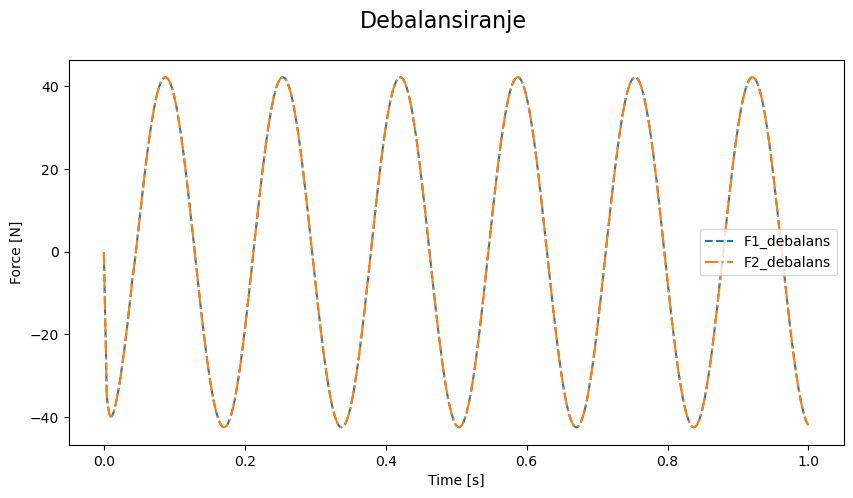

In [390]:
filename = 'meritve2/debalans22.txt'
data = open_txt_file(filename)
data[0]

Time = data[0]
t = Time
F1_debalans = data[1]
F2_debalans = data[2]

def print_data(data, Title):
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.suptitle(Title, fontsize=16)
    ax.plot(data[0], data[1], '--', label='F1_debalans')
    ax.plot(data[0], data[2], '-.', label='F2_debalans')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Force [N]')
    ax.legend();

data_debalans = open_txt_file(filename)
data_debalans[1] = data_debalans[1] - np.mean(data_debalans[1])
data_debalans[2] = data_debalans[2] - np.mean(data_debalans[2])
print_data(data_debalans, Title='Debalansiranje')


In [391]:
np.average(data_debalans[1])

-1.4764524379430654e-15

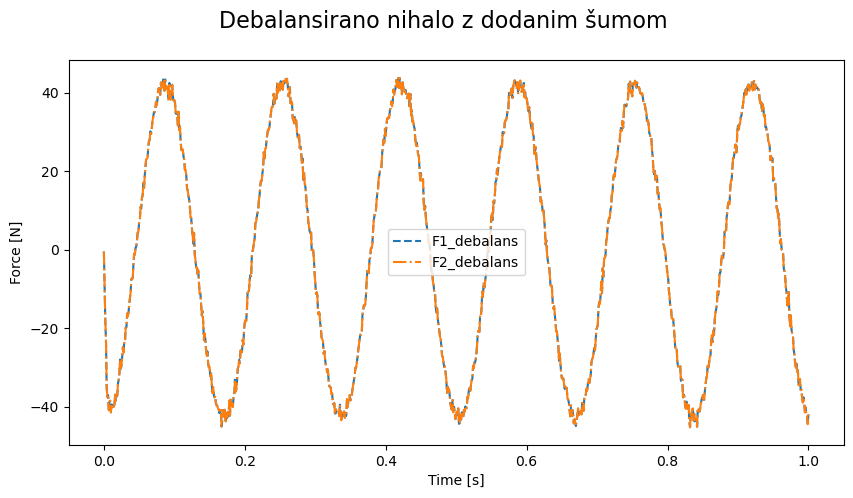

In [392]:
noise_amplitude = 1.2;
noise = np.random.normal(scale=noise_amplitude, size=len(t))
data_debalans_noise = data_debalans.copy()
data_debalans_noise[1] = data_debalans[1] + noise
data_debalans_noise[2] = data_debalans[2] + noise

print_data(data_debalans_noise, Title='Debalansirano nihalo z dodanim šumom')

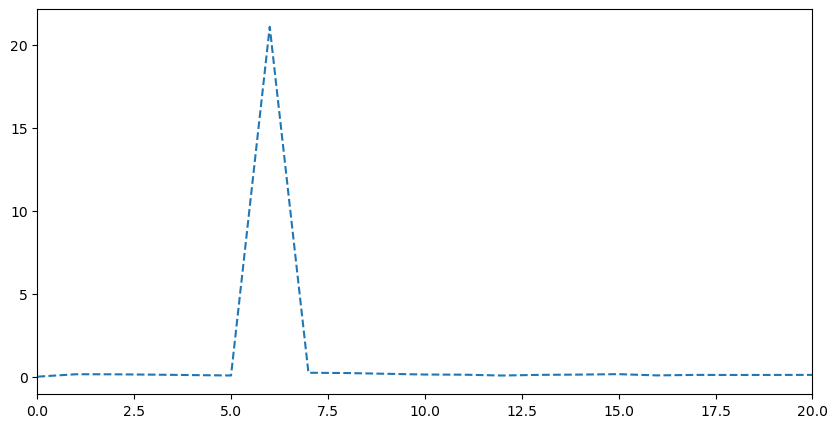

In [393]:
def Fourier(data):
    dt = data[0][1] - data[0][0]
    freq = np.fft.rfftfreq(len(data[0]), dt)
    Fourier_data = np.fft.rfft(data[1], norm="forward");

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(freq, np.abs(Fourier_data), '--')
    ax.set_xlim(0, 20)
    # freq
Fourier(data_debalans_noise)

In [394]:
freq_F = 6;
sos = signal.butter(3, [0.95*freq_F, 1.05*freq_F], 'bandpass', fs=1001, output='sos')
filtriran_debalans = data_debalans.copy()
filtriran_debalans[1] = signal.sosfiltfilt(sos, data_debalans_noise[1])#*np.hanning(len(Time)))
filtriran_debalans[2] = signal.sosfiltfilt(sos, data_debalans_noise[2]*np.hanning(len(Time)))

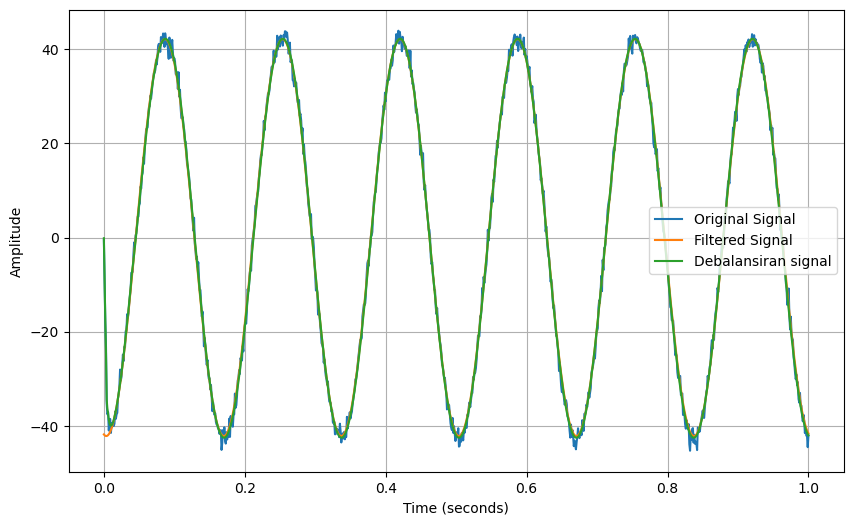

In [395]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic signal for demonstration purposes
sampling_rate = 1000
time = t
original_signal = data_debalans_noise[1]

# Step 1: Compute the FFT of the original signal
fft_signal = np.fft.fft(original_signal)

# Step 2: Apply a frequency-domain filter (e.g., zero out frequencies outside a specific range)
# Design the frequency domain filter (e.g., band-pass filter)
low_cutoff_freq = 5.0
high_cutoff_freq = 6.3
freq_range = (low_cutoff_freq, high_cutoff_freq)
filtered_fft_signal = np.copy(fft_signal)
freqs = np.fft.fftfreq(len(fft_signal), d=1/sampling_rate)
filtered_fft_signal[(freqs < freq_range[0]) | (freqs > freq_range[1])] = 0

# Step 3: Compute the Inverse FFT to get the filtered signal in the time domain
filtered_signal = 2*np.fft.ifft(filtered_fft_signal)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(time, original_signal, label='Original Signal')
plt.plot(time, filtered_signal.real, label='Filtered Signal')
plt.plot(time, data_debalans[1], label='Debalansiran signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()



(-1.0, 1.0)

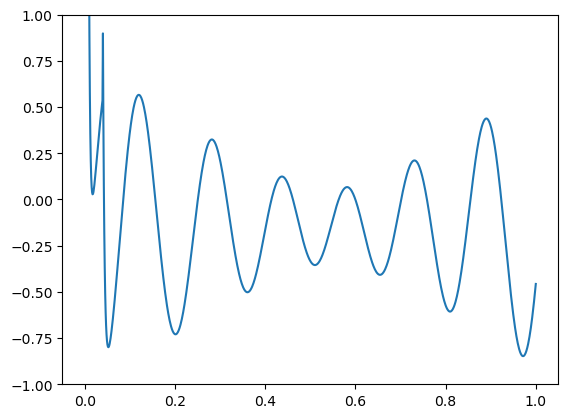

In [396]:
plt.plot(t, data_debalans[1] - filtered_signal.real)
plt.ylim(-1, 1)

In [397]:
# plt.plot(t, np.hanning(len(t)))
# plt.plot(t, data_debalans_noise[1])
# plt.plot(t, filtriran_debalans[1], label='filtered_a')
# plt.plot(t, signal.sosfiltfilt(sos, a), label='filtered')
# plt.legend()

In [398]:
# fig, ax = plt.subplots(figsize=(10,5))

# ax.set_title('Začetno stanje')
# ax.plot(t, 0.04*data_debalans[1], alpha=0.6, label='Podatki')
# ax.plot(t, 0.04*data_debalans_noise[1], alpha=0.6,  label='Podatki s šumom')
# ax.plot(t, filtriran_debalans[1], label='Filtrirani podatki')
# ax.plot(t, np.hanning(len(Time)), label='Hanning')
# ax.set_xlabel('Čas [s]')
# ax.set_ylabel('Pospešek [g]')
# ax.legend(loc='lower right')

Peaks found at indices: [ 87 254 420 587 754 921]
Peaks found at indices: [ 87 254 421 587 754 921]


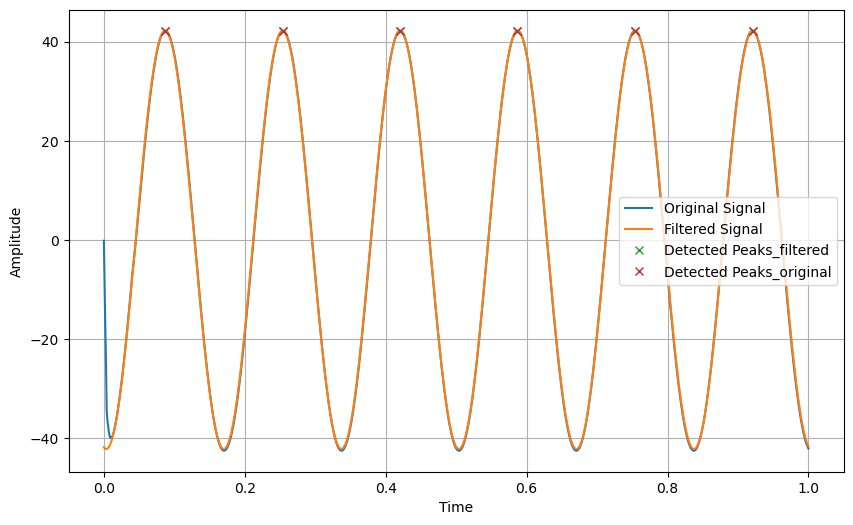

In [399]:
def find_and_print_peaks(signal_array, min_peak_distance=10):
    peaks, _ = signal.find_peaks(signal_array, distance=min_peak_distance)
    print("Peaks found at indices:", peaks)
    return peaks

# Example usage with a cleaner signal
cleaner_signal = filtered_signal
min_peak_distance = 50  # Set the minimum peak distance as needed

peaks = find_and_print_peaks(cleaner_signal, min_peak_distance)
peaks2 = find_and_print_peaks(data_debalans[1], min_peak_distance)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, data_debalans[1], label='Original Signal')
ax.plot(t, filtered_signal, label='Filtered Signal')
ax.plot(t[peaks], filtered_signal[peaks], 'x', label='Detected Peaks_filtered')
ax.plot(t[peaks2], data_debalans[1][peaks2], 'x', label='Detected Peaks_original')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)


In [400]:
for i in np.arange(len(peaks)-1):
    print(peaks[i+1]-peaks[i])

167
166
167
167
167


### Testna masa

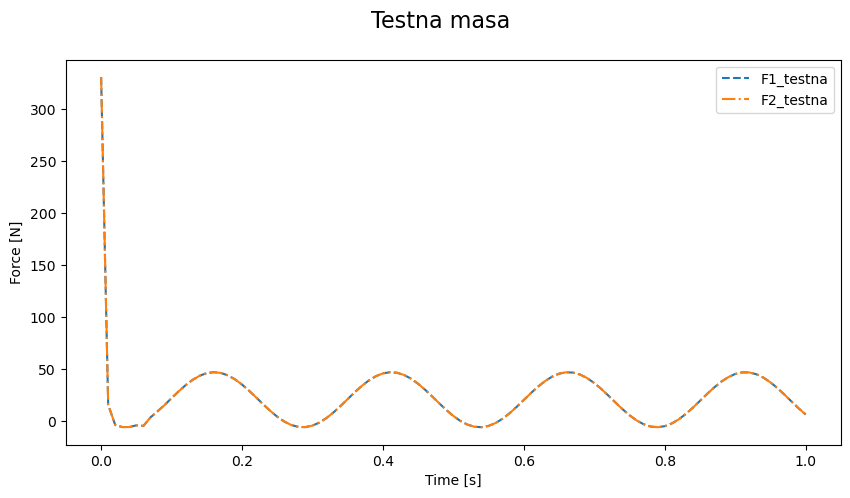

In [401]:

# Initialize empty lists for each column
column1_data = []
column2_data = []
column3_data = []

# Open the file for reading
with open('meritve/Meritev_testna_masa.txt', 'r') as file:

    # Skip the first 8 lines
    for _ in range(8):
        next(file)

    # Read the remaining lines and extract data from the columns
    for line in file:
        columns = line.strip().split()
        if len(columns) == 3:
            column1_data.append(float(columns[0].strip()))
            column2_data.append(float(columns[1].strip()))
            column3_data.append(float(columns[2].strip()))

# Convert the lists to NumPy arrays
column1_array = np.array(column1_data)
column2_array = np.array(column2_data)
column3_array = np.array(column3_data)

# Now you have the data in NumPy arrays
# print("Column 1:", column1_array)
# print("Column 2:", column2_array)
# print("Column 3:", column3_array)

Time = np.array(column1_data)
F1_testna = np.array(column2_data)
F2_testna = np.array(column3_data)

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Testna masa', fontsize=16)
ax.plot(Time, F1_testna, '--', label='F1_testna')
ax.plot(Time, F2_testna, '-.', label='F2_testna')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Force [N]')
ax.legend();


### Korekcijska masa

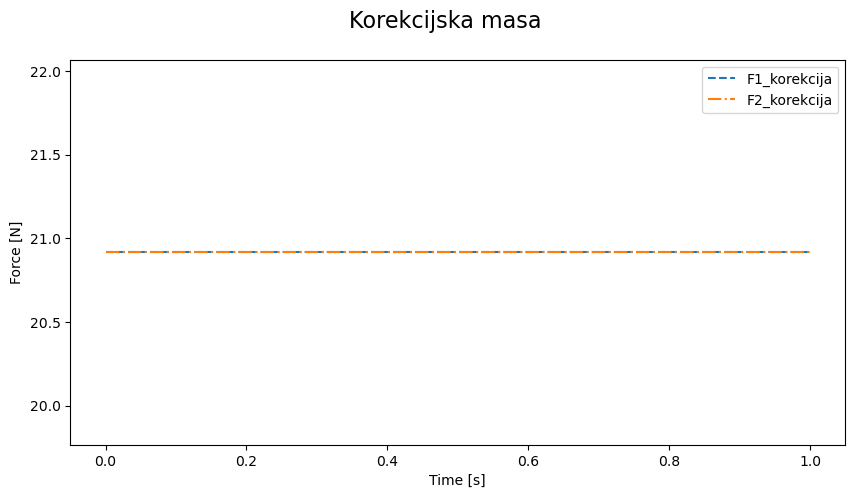

In [402]:

# Initialize empty lists for each column
column1_data = []
column2_data = []
column3_data = []

# Open the file for reading
with open('meritve/Meritev_korekcijska_masa.txt', 'r') as file:

    # Skip the first 8 lines
    for _ in range(8):
        next(file)

    # Read the remaining lines and extract data from the columns
    for line in file:
        columns = line.strip().split()
        if len(columns) == 3:
            column1_data.append(float(columns[0].strip()))
            column2_data.append(float(columns[1].strip()))
            column3_data.append(float(columns[2].strip()))

# Convert the lists to NumPy arrays
column1_array = np.array(column1_data)
column2_array = np.array(column2_data)
column3_array = np.array(column3_data)

# Now you have the data in NumPy arrays
# print("Column 1:", column1_array)
# print("Column 2:", column2_array)
# print("Column 3:", column3_array)

Time = np.array(column1_data)
F1_korekcija = np.array(column2_data)
F2_korekcija = np.array(column3_data)

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Korekcijska masa', fontsize=16)
ax.plot(Time, F1_korekcija, '--', label='F1_korekcija')
ax.plot(Time, F2_korekcija, '-.', label='F2_korekcija')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Force [N]')
ax.legend();


ValueError: x and y must have same first dimension, but have shapes (101,) and (1001,)

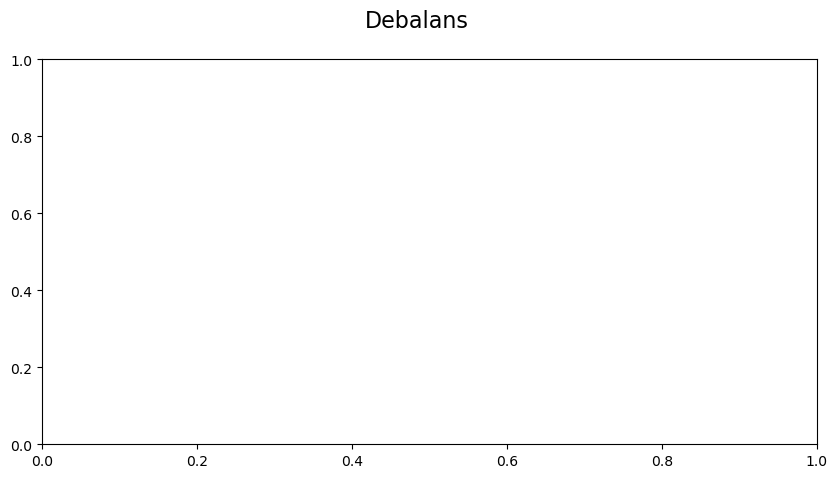

In [403]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Debalans', fontsize=16)
ax.plot(Time, F1_debalans, '--', label='F1_debalans')
ax.plot(Time, F1_testna, '--', label='F1_testna')
ax.plot(Time, F1_korekcija, label='F1_korekcija')
ax.set_xlim(0, 1)
ax.set_ylim(-10, 50)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Force [N]')
ax.legend();


In [ ]:
F1_debalans

array([17.97423  , -0.2162177,  0.8495509,  3.419235 ,  6.71389  ,
       10.78399  , 15.00695  , 19.77603  , 24.51086  , 28.87934  ,
       32.02705  , 34.73961  , 36.29417  , 36.70787  , 35.96244  ,
       34.09688  , 31.22898  , 27.53703  , 23.21249  , 18.67619  ,
       13.99258  ,  9.59285  ,  5.669006 ,  2.590944 ,  0.4428073,
       -0.641651 , -0.5558282,  0.6891136,  3.003696 ,  6.245849 ,
       10.21876  , 14.67522  , 19.33637  , 23.9123   , 28.11914  ,
       31.69542  , 34.41855  , 36.11919  , 36.69165  , 36.10039  ,
       34.38212  , 31.64368  , 28.05534  , 23.8402   , 19.26035  ,
       14.60053  , 10.15046  ,  6.186844 ,  2.956104 ,  0.659116 ,
       -0.5613034, -0.6292748,  0.4594281,  2.637115 ,  5.768388 ,
        9.658559 , 14.06576  , 18.71596  , 23.32005  , 27.59176  ,
       31.26549  , 34.11284  , 35.95677  , 36.68262  , 36.24528  ,
       34.67193  , 32.0604   , 28.57306  , 24.42673  , 19.87921  ,
       15.21325  , 10.71896  ,  6.675756 ,  3.335038 ,  0.9045

In [ ]:
len(Time)

101

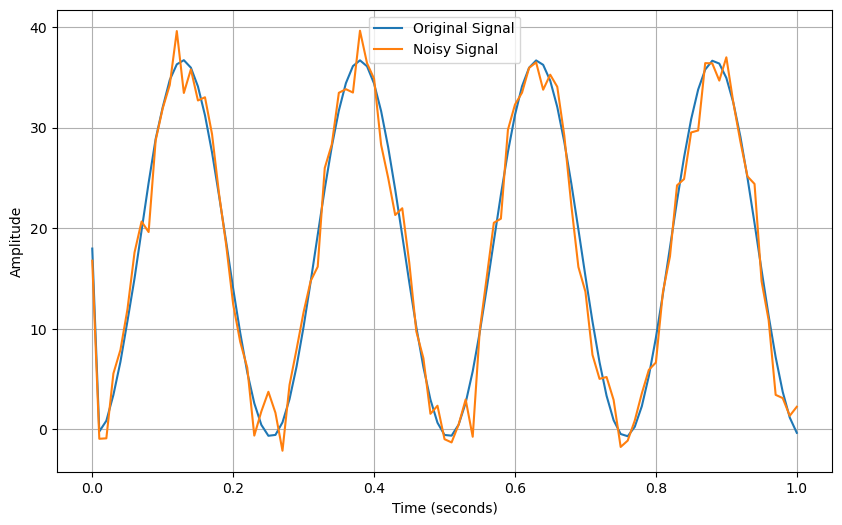

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def add_noise_to_signal(signal, noise_amplitude):
    noise = np.random.normal(scale=noise_amplitude, size=len(signal))
    return signal + noise

def apply_low_pass_filter(signal, cutoff_freq, sampling_rate):
    nyquist_freq = 0.5 * sampling_rate
    normalized_cutoff = cutoff_freq / nyquist_freq
    b, a = signal.butter(4, normalized_cutoff, btype='low')
    filtered_signal = signal.filtfilt(b, a, signal, padtype='even')
    return filtered_signal

# Assuming you have the original signal as an array of numbers
original_signal = F1_debalans

# Define the parameters for noise and filtering
noise_amplitude = 2  # Adjust this value to control the amount of noise
cutoff_frequency = 5.0  # Adjust this value to control the cutoff frequency of the low-pass filter
sampling_rate = 100  # Adjust this value to match the sampling rate of your signal

# Add noise to the original signal
noisy_signal = add_noise_to_signal(original_signal, noise_amplitude)

# Apply a low-pass filter to the noisy signal
# filtered_signal = apply_low_pass_filter(noisy_signal, cutoff_frequency, sampling_rate)

# Plot the original, noisy, and filtered signals
time = np.arange(len(original_signal)) / sampling_rate

plt.figure(figsize=(10, 6))
plt.plot(time, original_signal, label='Original Signal')
plt.plot(time, noisy_signal, label='Noisy Signal')
# plt.plot(time, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
